[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/unpackAI/BL101/blob/main/course_notebooks/Week_2_Non-fungible_Tokens(NFTs)/02_Non-fungible_Tokens(NFTs)_Workbook.ipynb)

# 💻Week 2 Workbook of unpackAI "DL101 Bootcamp"

## 📕 Learning Objectives of the Week

* Understand the process of minting NFTs
* Build, deploy and mint your own NFT: off-chain, on-chain and on IPFS
* Create a frontend and connect it with a wallet


 
>**🎯 Our Goal**: We will guide you thru the way to mint your own NFT. We will cover the whole process from crating the contract till building the user frontend. In fact, we will build three different NFTs: one off-chain, one on-chain, and one collectible. Follow the instructions in this Workbook. *We try to keep the process as simple as possible*. 

## Setup free replit account 🏦

**Replit** is a free online coding environment. It works similiar to IDE's (*Integrated Development Environments*) like **VS Studio Code**, **Sublime**, etc. But it has the advantage that we did all the initial set-up.   

If you haven't setup an account, we ask to do it now. Please follow 👉🏻👉🏻👉🏻[this link](https://replit.com/teams/join/fwdgojsgdqqqbtqobfgufqaotyivybkl-Blockchain101)👈🏻👈🏻👈🏻. It will bring you to your assignments and ask you on the way to signup (if you haven't yet).

## Assigment 1a: Create an off-chain NFT
>👉🏻👨‍💻 Quicklink to your [Assignment 1a on replit](https://replit.com/team/Blockchain101/1-my-first-NFT)

>🎯 *You will write a smart contract from scratch which points to the metadata and image stored on the internet. You will then deploy the contract and watch your result on Opensea.*    

>🧐 **Why is this important?** *Off-chain NFTs provide you the cheapest way to mint NFTs and might be an alternative for organizations to mint manymany tokens and where data can be stored on it's own server. (Think about a company which wants to mint an NFT for each employee but wants to host images and metadata on its own server (for privacy reason or to save `gas`).)*

### 🖥 Make yourself familiar with `replit` 
We provided an online **IDE** (Inegrated Development Environment) where you can run and test code and experiment it in a save environment without any hassle of set-up and configuration.   

If you go to [replit.com/1-myfirstNFT](https://replit.com/team/Blockchain101/1-my-first-NFT) you asked to create a new **replit** account. 

After seeting up your account you will see a three-window panel:      

![Replit Interface](https://www.dropbox.com/s/ckh571pzk7mtl12/replit-introduction.png?dl=1)
 
 - On the **left** site is the **explorer** with all files, data, configs, images, etc. we need. We already provided all necessary files and did the intial set-up for you. So you can solely concentrate on writing your contract and deploying your NFT to the blockchain. 
 - In the **middle** is the editor where you can write your code. Keep in mind that you dont't have to save. Every change will be saved immediately.
 - On the **right** side you find the **Shell** to execute system relevant code and a **Markdown** Preview for the README.md where we provide some instructions for you. The **Console** is not important in this course.


### 🦊 MINT YOUR FIRST NFT
### 1️⃣ Create your Metadata
1. 🛫 upload an image or peace of art (e.g. on [imgur.com](https://imgur.com)). Copy the `url` to your image.
2. ✍️ create your NFTs metadata and paste your image url from 1️⃣ like here:  
    ```
      {
        "name": "My first NFT",
        "description": "An awesome NFT everybody should know about!!!",
        "image": "https://i.imgur.com/4tneqoC.png"
      }
    ```  
    Copy the metadata and 🛫 paste it *hasselfree* on [jsonkeeper](https://jsonkeeper.com/). You become an url in return. Copy it!
    
... we will need that **url** later. So copy and save it somewhere! 🧲   
*Let's start with writing the smart-contract:*   

#### 2️⃣ Create a contract that mints NFTs 👩🏾‍💻 
Go to the left side in the explorer and add a new file under /contracts. Name it `MyFirstNFT.sol`:    

![Create soldity file](https://www.dropbox.com/s/j8kvay7v5n7tsq2/replit-create-contract.png?dl=1)  


#### a) Solidity version 🔢
Every solidity contract should start with the License-Identifier and the solidity version:    

```
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.1;
```

>*The License-Identifiere is optional (some IDEs might print a warning if its missing). The Solidity Version on the other hand is essential. It must match the version of all other files and configs which interacts with your contract.*

> 👉🏻👉🏻 Copy it and paste it into your contract! 👩🏾‍💻  

#### b) Zeppelin Integration 🛸
Remember what defines an NFTs? The **ERC-721** standard. This standard consist of a bunch of methods and variables. We could could copy the code defining this standard into our contract. But instead we simply import this from [OpenZeppelin](https://docs.openzeppelin.com/contracts/4.x/erc721#constructing_an_erc721_token_contract).  
We already did this for you (with the help of `hardhat` - a javascript based library for blockchain development).  
If you look on the left site you will see und `/artifacts/@openzeppelin/...` the file `ERC721.json`:    

![ERC721.json](images/replit-ERC721.png)    

... 🖱 *we need to import it into our contract by adding this import statement:*

```
...
import "@openzeppelin/contracts/token/ERC721/extensions/ERC721URIStorage.sol";
```
We will also add an statement which lets us increment our NFT tokens *(we will need this for later assignements)*:
```
import "@openzeppelin/contracts/utils/Counters.sol";
import "hardhat/console.sol";
```   

*(the second line `import "hardhat/console.sol";` is for interacting with our contract from the console - don't worry about this for now)*   

>👉🏻👉🏻 Add these import statements to your contract! 👩🏾‍💻

#### c) Contract object 📜 
Every solidity contract starts with the `contract` keyword - it is an object holding your contract functions and variables. It can itself inherit from other contracts. And this is what we do here: we inherit the **ERC-721** class into our solidity object. Add this code:  

... and don't forget the closing curly brace at the end. Everything we will add must be inside these curly braces.

```
contract MyFirstNFT is ERC721URIStorage { 
                                       
```   
At this point we also add a counter object which helps us to keep track of our token:  
```
using Counters for Counters.Counter;
  Counters.Counter private _tokenIds;
```  
>👉🏻👉🏻 Add these also to your contract!👩🏾‍💻

#### d) Token Name and Symbol 🔮
We need to pass the name of our NFTs token and its symbol. We are also adding a simple print statement:   

```
constructor() ERC721 ("MyFirstNFT", "MYFIRSTNFT") {
    console.log("This is my NFT contract. Woah!");
  }
```
>👉🏻👉🏻 Add this to your contract 👨‍💻   

#### e) Functions 🧮
**Functions** are essential parts of smart contracts. We already learned about them in **Week 1**. With the help of functions we or interact with our NFT later on the blockchain. Let's add a function to create our token. We call it `makeAnEpicNFT()`:  

```
function mintNFT() public {   //0️⃣ 
    
  uint256 newItemId = _tokenIds.current();    //1️⃣ 
  _safeMint(msg.sender, newItemId);   //2️⃣ 
  console.log("An NFT w/ ID %s has been minted to %s", newItemId, msg.sender);
  _setTokenURI(newItemId, "https://jsonkeeper.com/b/PT3P");   //3️⃣ 
  _tokenIds.increment();    //4️⃣ 
  }
```   
0️⃣  We declare this function as *public*, i.e. anybody can acess it. Then
1️⃣  we get the current tokenId, starting with 0 and 
2️⃣  mint the NFT to the sender using `msg.sender`. We
3️⃣  set the NFTs data from our json file on jsonkeeper.com and
4️⃣  increment the counter for when the next NFT is minted

>👉🏻👉🏻 Copy and paste this function into your contract and change the line `_setTokenURI(newItemId, "https://jsonkeeper.com/b/CWYT");` with your **json metadata url**! 👨‍💻

That's it for the *coding part* 🎉🥳👯‍♀️    

*If you haven't inserted the code while we went thru it, here is the whole code:*

#### Full annotated Code (for **c&p** if your stuck) 🌋

```
// SPDX-License-Identifier: MIT
// Smart contract that creates a simple NFTs based on an on-chain stored metadata image
pragma solidity ^0.8.1;

// We first import some OpenZeppelin Contracts.
import "@openzeppelin/contracts/token/ERC721/extensions/ERC721URIStorage.sol";
import "@openzeppelin/contracts/utils/Counters.sol";
import "hardhat/console.sol";

// We inherit the contract we imported. This means we'll have access
// to the inherited contract's methods.
contract MyFirstNFT is ERC721URIStorage {
  // Magic given to us by OpenZeppelin to help us keep track of tokenIds.
  using Counters for Counters.Counter;
  Counters.Counter private _tokenIds;

  // We need to pass the name of our NFTs token and its symbol.
  constructor() ERC721 ("MyFirstNFT", "MYFIRSTNFT") {
    console.log("This is my NFT contract. Woah!");
  }

  // A function our user will hit to get their NFT.
  function mintNFT() public {
     // Get the current tokenId, this starts at 0.
    uint256 newItemId = _tokenIds.current();

     // Actually mint the NFT to the sender using msg.sender.
    _safeMint(msg.sender, newItemId);
    console.log("An NFT w/ ID %s has been minted to %s", newItemId, msg.sender);

    // Set the NFTs data.
    _setTokenURI(newItemId, "https://jsonkeeper.com/b/Q1D9");

    // Increment the counter for when the next NFT is minted.
    _tokenIds.increment();
  }
}
````

Copy and paste it into `MyFirstNFT.sol`.

📬 *There is one last thing we need to do before we can mint our NFT. Setting up our 🦊 Metamask **private key** ...*


### 4️⃣ Adding Private Key 🔑
>- Confidential information such as your Wallet Private Key should never be **hard-coded** in your files. Otherwise, everybody who reads your code has access to it.   
>- A solution is to store your private credentials in a so called environment variable. They often are named like `.env`, or `.environment` and should be kept only on your local system. 
>- **replit** has a special folder for environment variables. You can access it from the left menu  (![icon of secret](https://www.dropbox.com/s/x68klf6q7k7q3xo/replit-secret-icon.png?dl=1)).   

If you want to use your own Metamask wallet to sign the contract. Insert your private key to your Rinkeby account from your Metmask wallet into the `Secrets` folder on the left pane in **replit**.   
You can also apply for an [Alchemy API]() and paste it as an environment variable into the Secrets:   

![private key in environment variable](https://www.dropbox.com/s/a0sk33pftbwd93g/replit-secret-privatekey.png?dl=1)   

🤨 If you don't have a private key, run the following python code. It will print out the `Metamask Wallet Private Key` we provided for you:  

In [2]:
# TO-DO: this into helpers.py
# PRINT WALLET ADDRESS & ALCHEMY API KEY
import os
import bl101
from dotenv import load_dotenv
import pkg_resources

ENVIRONMENT = pkg_resources.resource_filename('bl101', '.env')
load_dotenv(ENVIRONMENT)

# Print Metmask Private Key from unpackAI
#print("ALCHEMY_API_KEY_URL: ", "https://eth-rinkeby.alchemyapi.io/v2/" + os.getenv("ALCHEMY"))
print("PRIVATE_KEY: ", os.getenv("PRIVATEKEY"))

ALCHEMY_API_KEY_URL:  https://eth-rinkeby.alchemyapi.io/v2/kWwjuwmHKr7IVcg5uXFp-IfGMOA4_cJK
PRIVATE_KEY:  76d6692e881d5515aa528f4a6adf659947b26cd10b890111958949e2eafaf099


### 5️⃣ Deployment 🚛  
The last thing we need to do is write the code for deploying our smart contract. We already did this for you. But you can have a look into `scripts/deploy.js` to see how it looks like. 

If you now click on:    

![](https://www.dropbox.com/s/jsmgfs4zifugtqj/replit-run.png?dl=1)  

your NFT will be minted. 

*Follow the instructions on **Replit** and come back to the next Assignment ...*

----

## Assigment 1b: Create Collectible NFT on-chain
>👉🏻👩🏾‍💻 [You find your assignment here](https://replit.com/team/Blockchain101/2-my-second-NFT)
>🎯 *Building on what your already did in 1a, you will create a simple vector image and insert it into your NFT contract. Unlike 1a, image and metadata are now stored fully inside the contract. Again, you will deploy and watch it on Opensea.*    
>🧐 **Why is this important?** *SVGs stored in the contract is not very common. However, their might be use cases where you exactly want this: an NFT collections of symbols or QR-Codes which you can use in your organization as visualized proof of ownership*  

### 👑 GENERATE NFTs ON-CHAIN
>So far (and for the rest of this workbook) we minted our NFTs on the Testnet. (But the process is more or less the same on the mainnet a.k.a. the *real* blockchain).  However, on our **Rinkeby** testnet we do not need to think about gas fee and Opensea commission.   
>  
>🧐 *But while you coding your way thru the first assignment you might arise a few questions ...*

#### 🤖 Minting NFT with static SVG
- *What happens if `imgur` goes down?   
- What happens if `jsonkeeper` goes down?*   

Then we lose our NFT! 😳🤯🥶  

A solution would be to store image and metadata directly on the blockchain. 

*That's exactly what we do in this mini-assignment.*

#### 💰 Changing the blockchain costs money
The problem with on-chain NFTs: it can be costly! Whenever we change the blockchain it costs gas and the more we change the more gas it costs. But how can we store an image on the blockchain? Technically you could store the image's data inside the smart contract. But unless your image is not only 8x8 pixels it would be very inefficient. 👉🏻*(And actually there is a size limit for smart contracts.)*   

In this course we chose a different approach. We are going to store a vector image **on-chain**.   

*You might know the difference between vector and bitmap pictures?*   
- **Bitmaps** consists of pixels. Most pictures are bitmap format and the file size increases with the image size. Typicial file formats are `jpg` or `png`.   
Storing a bitmap on the blockchain is very costly.  

- **Vectors** on the other hand consist of geometric rules about how the image is constructed. Vectors are small in size (at least in most cases) and therefore perfect for on-chain storage. A common format for vectors is `svg`.

#### 🎨 Create an `svg`
Let's start by creating a simple `svg` image. Nothing fancy, just a colored rectangle with some text in the middle:
```
<svg xmlns="http://www.w3.org/2000/svg" preserveAspectRatio="xMinYMin meet" viewBox="0 0 200 200">
    <style>.base { fill: white; font-family: serif; font-size: 14px; }</style>
    <rect width="100%" height="100%" fill="pink" />
    <text x="50%" y="50%" class="base" dominant-baseline="middle" text-anchor="middle">MY SECOND EPIC NFT</text>
</svg>
```
You can copy ☝️ that `<svg>` code, paste it in an text editor or in an empty cell and change some attributes. Feel free to change the text, size, color, add more attributes, etc.  

To see the result copy & paste the code into an [online SVG Viewer](https://www.svgviewer.dev/). Or simply use the Python code snippe we provided you in the next cell: 

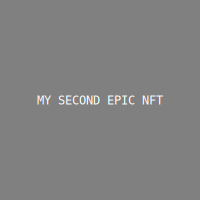

In [1]:
# DISPLAY SVG
from IPython.display import SVG, display

# 👇🏻 Paste your svg code here 👇🏻
svg = """
<svg xmlns="http://www.w3.org/2000/svg" preserveAspectRatio="xMinYMin meet" viewBox="0 0 200 200">
    <style>.base { fill: white; font-family: monospace; font-size: 12px; }</style>
    <rect width="100%" height="100%" fill="grey" />
    <text x="50%" y="50%" class="base" dominant-baseline="middle" text-anchor="middle">MY SECOND EPIC NFT</text>
</svg>
""" 

display(SVG(svg))

🙋🏻‍♂️ **Next step:** we need to encode our **svg** into `base64` format. Think about base64 as a basic language between your source language (your svg code) and the bytecode which we will later send to the blockchain. 

There are [online base64 encoder](https://www.utilities-online.info/base64) which you can use.  

>*Or you just run this 👇🏻 code snippet:*
 
 *(if you used the previous code for displaying your svg we stored your svg into the `svg` variable):*

In [24]:
# CONVERT STRING --> BASE64
import base64
  
#svg = "YOUR_SVG"
sample_string_bytes = svg.encode("ascii")
base64_bytes = base64.b64encode(sample_string_bytes)
base64_string = base64_bytes.decode("ascii")
  
print(base64_string)

CjxzdmcgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiBwcmVzZXJ2ZUFzcGVjdFJhdGlvPSJ4TWluWU1pbiBtZWV0IiB2aWV3Qm94PSIwIDAgMjAwIDIwMCI+CiAgICA8c3R5bGU+LmJhc2UgeyBmaWxsOiB3aGl0ZTsgZm9udC1mYW1pbHk6IG1vbm9zcGFjZTsgZm9udC1zaXplOiAxMnB4OyB9PC9zdHlsZT4KICAgIDxyZWN0IHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIGZpbGw9ImdyZXkiIC8+CiAgICA8dGV4dCB4PSI1MCUiIHk9IjUwJSIgY2xhc3M9ImJhc2UiIGRvbWluYW50LWJhc2VsaW5lPSJtaWRkbGUiIHRleHQtYW5jaG9yPSJtaWRkbGUiPk1ZIFNFQ09ORCBFUElDIE5GVDwvdGV4dD4KPC9zdmc+Cg==


You can double check if your base64 encoded svg works by simply pasting it into any **browser** in this format:   
>`data:image/svg+xml;base64,YOUR_BASE64_ENCODED_SVG`👈🏻

*In the svg above it would therefore look like:*   
```

```

#### 📄 Create `json` metadata
Let's create some basic metadata with `name`, `description` and `image`:   
```
{
  "name": "MySecondNFT",
  "description": "An NFT as plain and simple as epic,
  "image": "data:image/svg+xml;base64,👉🏻YOUR_BASE64_ENCODED_SVG👈🏻"
  
}
```  
You can chose any name and description. Then paste your encoded svg into the value field of the `image` key. (👆🏻 see above example 👆🏻)

**Encode Metadata**  
Next, we encode our metadata to `base64` like we did before with our svg:  paste the metadata into the same [online base64 encoder](https://www.utilities-online.info/base64), press encode and copy your encoded result. We need this in the next part to paste it into our contract:   
![Encode Metadata to base64 format](images/encoding-metadata.png)  

*(Of course you can use the same code snippet from above - but this time the online tool might be more handable.)*

*If you want you can check your metadata by pasting it like this:
`data:application/json;base64,👉🏻ENCODED_METADATA👈🏻` into your browser. It won't display the embedded image but you can see your metadata:*  
![Metadata displayed in the browser](images/metadata-browser.png)

🥱  *We're almost there!* 🥳  

#### 💉 Insert metadata (and image) into contract    
*It's time to switch to **replit** (if you haven't already) ...*

We are now going to insert our encoded metadata into our contract. 

We just need to change one line in `contracts/MyNFT.sol`: 

`_setTokenURI(newItemId, "data:application/json;base64,👉🏻ENCODED_METADATA👈🏻")`  

That's it! 🕺💃. We have our image embedded in our metadata and our metadata embedded in our contract. *Ready for deploying ...* 🚀🧨

#### 🚀 Deploy to Blockchain
The final step now is to deploy our updated contract to Rinkeby Testnet and mint our NFT:    
Simply click `Run` 🎬 or 👩🏾‍💻 type `npx hardhat run scripts/deploy.js --network rinkeby` in the **Shell**. 

>👁 Watch the **Shell** output as you need to copy the `deployment address`.

##### 🌊 View on OpenSea
>Like before, paste your `deployment address` into [opensea.io](https://testnets.opensea.io/) to see your minted NFT:   

![NFT on opensea testnet](https://www.dropbox.com/s/8yplxlap4yxdsxt/opensea_MySecondNFT.png?dl=1)

*And again, alternatively you can display your NFT on [Rarible](https://rinkeby.rarible.com/).* 😉

## Assigment 1c: Create Collectible NFT and mint on IPFS
>🎯 *We will change our NFT contract in a way that it automatically creates variations of NFTs (a.k.a.: collectibles). You will get an idea why it's called **smart** contracts. *    
>**Why is this important?** *Collectible NFTs are variations of basic tokens. You can automate the creation of new tokens (e.g. a new employee entered into the master data of the database automatically creates an NFT and stores it on the blockchain) for "mass production" of tokens.*

>👉🏻👨‍💻 [You find your assignment here](https://replit.com/team/Blockchain101/3-my-first-Collectible)

###  Our first collectible 👯‍♂️ NFT on-chain 
🤯 *Do you remember these famous **Ape Yacht** we mentioned in the coursebook?*   

In this mini assignment we will build something similiar, but way simpler. We will continue with our on-chain svg NFT from **Assignment 1b** and enchance it to a collectible NFT.  
I.e. we will dynamically generate SVG NFTs on-chain.  

>This assignment is different: we don't expect you to write any code. We already wrote the smart contract and it's ready for deploying. So you grab a coffee ☕️ can relax 🛋 and see the result on 🌊 Opensea. However, we encourage you to look into the contract and try to understand as much as possible.

🏎 *Let's go!*  

#### 🧐 Reflect on the code
>Our NFT contract this time randomly generates words on an svg image.

Let's try to understand how it is doing this:  
- Go to `contracts/MyFirstCollectible.sol`
- Go thru the code and try to understand what each part is doing. We put numbers behind each part. Have a look into this table for more information:

|Position|Name|Description|
|--|--|--|
|0️⃣|License Identifier|not necessary, but the compiler will print a warning when missing|
|1️⃣|`pragma` keyword|what version of the compiler are valid to compile this contract *(solidity is a dynamically developed language: new functionalities are added over time*)|
|2️⃣|comments|`//`👈🏻 single-line; `/*`👈🏻 multiline 👉🏻`*/`|
|3️⃣ a)|Import statement for `Strings.sol`|imports an extension to work with strings. You can see it at: `/artificats/@openzeppelin/contracts/utils/Strings.sol`)|
|3️⃣ b)|Import statement for **ERC721**|imports the ERC721 ("NFT") solidity contract with all functions as described in the coursebook. You can see it at: `/artificats/@openzeppelin/contracts/token/ERC721/extensions/ERC721URIStorage.sol`)|
|3️⃣ c)|Import statement for `Counters.sol`|imports an extension we need to count our NFT collectibles. You can see it at: `/artificats/@openzeppelin/contracts/utils/Counters.sol"`)|
|3️⃣ d)|Import statement for printing out statements or variables to the console |it's part of `hardhat` library, not necessary for deploying our contract to the blockchain but useful for developing and debugging|
|3️⃣ e)|Import of an helper function |`Base64.sol` contains a function to convert strings to base64 format (like the [online base64 encoder](https://www.utilities-online.info/base64) in the last assignment. You can see it at: `/contracts/libraries/Base64.sol`|
|4️⃣|contract definition|names and defines the contract object and inherits from the ERC721 contract we imported in 3️⃣ b). We call this contract by this name later when we deploy it (👉🏻 `scripts/deploy.js`). Often people use the same name for contract and file|
|5️⃣|||
|5️⃣|||
|6️⃣|variable of type `string` for the first part of our `svg`|`baseSVG` contains the part of the svg where we declare form, color, text-font, etc. *Feel free to change some values.* We will later add the text to this variable and close the tags.|
|7️⃣|arrays (similar to `list` in **Python**) of type `string` containing the words we later pick randomly to display on our NFT|*Feel free to change the words.* Our NFT will show a sentence like  `firstWord` + `secondWord` + `thirdWord`. As we pick these words randomly, our NFT collectibles become unique.|
|8️⃣|`constructor()`||
|🖨|`console.log()`|Useful command provided by the `hardhat` library (we imported it in 3️⃣ c)). It will print the text to the console. To print variables inside text use placeholder like `%s` followed by the variable name after the string.|
|9️⃣ a)|`pickRandom___word()` (function)|Function that inputs the `tokenId` (a variable defined in and inherited from `ERC721URIStorage`) and returns a variable of type `string`. The function is `public`, i.e. it can be called from everywhere (e.g. from other contracts) and declared as `view`, i.e. the function does not modify the state of the blockchain (🤓 *no gas needed when calling this function*). |
|9️⃣ b)|`random()`|this simulates randomness by combining two strings ("FirstWord" and a stringified version of `TokenId`) and calling the function `random()` (👉🏻 1️⃣0️⃣). It produces a long integer.|
|9️⃣ c)|`rand % firstWords.length`|Modulus of number of words in `firstWords` of the long integer from 9️⃣ b). This produces a number between 0 and 5.|
|9️⃣ d)|`firstWords[rand]`|the word from the `firstWords` array at position 9️⃣ c) |
|1️⃣0️⃣|`random()`|Simple function which inputs a string and converts it into a `keccak256`-hash. The function is `internal`, i.e. it can only be called from inside this contract. |




#### 🔤 Randomly generate words on an image
You can individualize your NFT by changing ...  
1. the **svg** attributes inside the `<style>` and `<text>` tags(👉🏻 6️⃣). You can change color, size, text-font, etc. like we did in the previous assignment.
2. replace the words in 7️⃣   

#### 🔬 Test locally
This time we configured the ![](https://www.dropbox.com/s/jsmgfs4zifugtqj/replit-run.png?dl=1) button in a way that it deploys to the local blockchain (the javascript library `hardhat` which we use here has a build-in blockchain) first. This is faster during the development process. 
Simply click `Run` 🎬 or 👩🏾‍💻 type `npx hardhat run scripts/deploy.js --network rinkeby` and watch the shell output:  

![shell output after executing deploy.js](images/shell-run.png)  

We see two minted NFTs and their `<svg>`. We can copy one of the NFTs `<svg> xmlsns='...</svg>` and paste it into [Online SVG Viewser](https://www.svgviewer.dev/) to see our NFT:   

![SVG of minted NFT](images/svg-image2.png)

#### 🚀 Deploy to Rinkeby and watch on 🌊 OpenSea
As in our previous courses we want to deploy our collectible to the *real* (testnet) blockchain, mint it and watch it on OpenSea. 
Run `npx hardhat run scripts/deploy.js --network rinkeby` shell, copy the deployment address:  
![shell output after executing deploy.js](images/shell-deploy2.png)  

and 🔥 fire-up [opensea.io](https://testnets.opensea.io/) and search the newly deployed contract address. Again, don't click enter. *OpenSea is weird so you'll need click the collection itself when it comes up.*
In our example:
![Minted collectible on OpenSea](https://www.dropbox.com/s/884yllyhuvt2fz5/opensea_MyFirstCollectible.png?dl=1)

*(And again, if it does not show up on OpenSea use [Rarible](https://rinkeby.rarible.com) instead.)*

>Congratulations! 🎊🥳👯‍♂️ These were the assignment for the NFT week. You should got some insights into the coding part of creating and deploying smart contracts.   
>  
>💪 ***Now it's your turn to reflect on what you learnt:***

## 👨‍🏫 Assignment 2: Present your work to your classmates 👩🏻‍🎓👨‍🎓🐶

We want you to prepare a presentation (ca. 10 min) where you show us your minted NFTs. 

You are free about the content of your presentation.

*But you can also pick some of these questions and answer them:*   
- Copy & Paste your token address into the [Rinkeby Testnet](https://rinkeby.etherscan.io/). What information can you see? Also reflect about these questions:
    - *We haven't provided our wallet address - how does the blockchain know that we are the owner of that token. How are we paid when we sell the token?*
    - *How safe is the minting process? There is one peace of personal information that looks confidential. Which information is it? And why is it not confidential in the blockchain world?*
- Try to understand and explain the code:
    - *What are the different parts of the NFT contracts doing?*
    - *Why do we use such a long function to simulate a random number?* (👉🏻9️⃣ together with 1️⃣0️⃣) *Why does Solidity not have a simple command to produce randomness (like most other languages)?*
    - *How is the deployment process working?* 👉🏻 `scripts/deploy.js` 👈🏻
    - *What is the use of `hardhat.config.js`?*
- Some critics say that NFTs are dead, other that it was a *Ponzi Scheme* in the first place. *What do you think? How do you think the NFT market might develop in the future?*
- *Can you think of other use cases where NFTs could be helpful in your personal or business life?* 

---  
# Appendix: Where can you go from here? 🚶‍♀️
>🎖 *This part is fully optional!*  

## 🤿 Dive into the real blockchain world
Why don't you mint your NFT on the *real* blockchain? You can use the same code by only changing the `alchemy` url and your 🦊 private key:   
1. If you haven't alread setup your Metamask Wallet as described in this weeks coursebook *(You can skip the part with the test-ether.)*.
2. Deposit some real ether *(you need some Ether for gas and opensea fee)* following [these instructions]().
3. Create your image, json, etc.
4. Change the following code in `hardhat.config.js`:  
💥💥💥💥💥💥💥💥💥   
`const alchemy = 'https://eth-rinkeby.alchemyapi.io/v2/👉🏻ALCHEMY_API_KEY_URL👈🏻'` to:        
`const alchemy = 'https://eth-mainnet.alchemyapi.io/v2/👉🏻ALCHEMY_API_KEY_URL👈🏻'`   
💥💥💥💥💥💥💥💥💥  

*(Again: you can use our ALCHEMY API KEY or get your own at [alchemyapi.io](https://auth.alchemyapi.io/))*

5. Enter `npx hardhat clean; npx hardhat run scripts/deploy.js --network rinkeby`

## NFT-SANDBOX 🏝
We provided a **replit** with above assignments in one place (every folder is one assignment). You can mess around, change code, try out ... We will also add more projects for you over the time.    

>🚪 You can acess your Sandbox thru [this link](https://replit.com/team/Blockchain101/NFT-SANDBOX) 👈🏻👈🏻

## 👨‍💻 Do some weekend projects on 🦄 **buildspace**
>We found two other interesting projects:
1. [Ship your own NFT collection on Flow](https://buildspace.so/p/nfts-on-flow): *Learn Cadence and build an NFT collection on Flow! This is a short and async weekend project for curious devs that want to get started on Flow. You’ll learn how to write and deploy your first Flow smart contract using Cadence, build a web3 React app and connect them all together to let people connect their wallet and mint NFTs.*   
2. [Ship your own custom NFT collection on Solana w/ Metaplex in a weekend](https://buildspace.so/p/ship-solana-nft-collection): *This is a chill, weekend project for any curious dev that wants to hack together some NFTs on Solana alongside some internet friends. You’ll generate your own custom NFTs and then build a storefront for someone to connect their wallet and mint your epic NFTs. All you need to know is React*

## 💏 Get more familiar with 🌊 **Opensea**
If you more interested in the trading 💰 or art 🖼  part of NFT, have a look at the excellent good-readable docs provided by 🌊 Opensea. You can start with their [FAQs](https://docs.opensea.io/docs/frequently-asked-questions) and head over to the [OpenSea Developer Platform](https://docs.opensea.io/).
For the more technical part have a look into their [Developer Tutorials](https://docs.opensea.io/docs/developer-tutorials).

Of course, you can also have a look into the other platforms and the information they provide:  
- [Rarible](https://rinkeby.rarible.com/how-it-works) 👈🏻 *2nd largest NFT market place, 2.5% commission (+gas), provides also Testnet*  
- [LooksRare](https://looksrare.org) 👈🏻 *they claim 20% less commission than OpenSea*  
- [Gem.xyz](http://gem.xyz/) 👈🏻 *NFT marketplace aggregator, aquired by OpenSea*
- [SuperRare](https://superrare.com) 👈🏻 *focus on high-price art, review-process, 15% (3%) commission fee for seller (buyer)*

Some Cryptocurrency / Wallets recently added NFT marketplaces: 
- [Coinbase NFT](https://nft.coinbase.com) 
- [Binance](https://www.binance.com/en/nft/home)


## Set-up your own 💻 IDE (Integrated Development Environment)
Instead of using **replit**, setup your own coding environment on your computer. We suggest **Visual Studio Code**. It's free, runs on all platforms and became one of the most used IDEs in the last years. You can download it [here](https://code.visualstudio.com/download). 

We recommend the first chapters (for setting up) and the NFT chapter of **Patrick Collins Solidity, Blockchain, and Smart Contract Course - Beginner to Expert** on Youtube 📺:.  *This is one of the best courses to learn blockchain coding and most of us learnt it thru this course.*

Patrick offers two formats on Youtube 📺:
1. Python: [Solidity, Blockchain, and Smart Contract Course – Beginner to Expert Python Tutorial](https://www.youtube.com/watch?v=M576WGiDBdQ) 👈🏻 16-Hour Course 😕
2. Javascript: [Learn Blockchain, Solidity, and Full Stack Web3 Development with JavaScript](https://www.youtube.com/watch?v=gyMwXuJrbJQ) 👈🏻 32-Hour Course 😳
